## Gaussian Mixture Model - GMM

In [1]:
%matplotlib inline
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
sn.set(style='whitegrid')

### 1.  Generate some data samples from a 1D GMM with two Gaussian Components

In [2]:
data=np.zeros((1000,))
for n in range(0, 1000):
    #randomly select a Gaussian component (c0, c1) with prob of 0.5
    r= int(np.random.rand() > 0.5)  # rand ~ uniform random distribution
    if r == 0:
       # randomly draw a sample from the Gaussian component (mean = 2, std=1)
       sample =  2 + np.random.randn() 
    else:
       # randomly draw a sample from the Gaussian component (mean = 6, std=1)
       sample =  6 + np.random.randn() 
    data[n]=sample

In [3]:
data

array([ 1.91189942e+00,  3.96180276e+00,  6.79891008e+00,  5.72624160e+00,
        6.17030124e+00,  5.99997796e+00,  6.15355782e+00,  5.29434885e+00,
        7.57794329e+00,  6.86711167e+00,  6.88989412e+00,  1.81609764e+00,
        2.74989058e+00,  7.05581972e+00,  2.54967882e+00,  5.53802764e+00,
        5.24497495e+00,  3.18939427e+00,  3.06650683e+00,  5.11996565e+00,
        4.53305952e+00,  1.62290674e+00,  4.07461887e+00,  5.20813071e+00,
        2.49799001e+00,  5.27183054e+00,  1.13385316e+00,  2.36853776e+00,
        1.56774774e+00,  3.32559192e+00,  3.68215309e+00,  4.39223007e+00,
        7.27743543e+00,  1.35461683e+00,  4.52643448e+00,  5.03690094e+00,
        6.64680304e+00,  7.10169594e+00,  6.44538322e+00,  4.19006924e+00,
        7.33023430e+00,  3.36332782e+00,  3.19786451e+00,  8.38470312e-01,
        3.77832792e+00,  5.61794781e+00,  1.04221695e-01,  8.66069193e+00,
        4.10561293e+00,  3.65492253e-01,  3.63882020e+00,  3.28014078e+00,
        4.46188238e-01,  

visualize the 1D data by using 1D histogram 

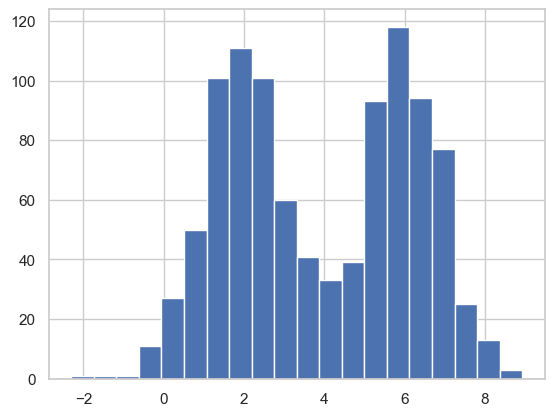

In [4]:
fig, ax = plt.subplots()
ax.hist(data, bins=20);

### 2. Estimate the Parameters of the 1D GMM from  the Data Samples

### Let's pretend that we do not know how the `data` is generated. 
### We 'guess' that the data samples are from a 1D GMM with two Gaussian components.
### Use Maximum Likelihood (ML) method to estimate the parameters of the 1D GMM

In [5]:
from sklearn.mixture import GaussianMixture
GMM=GaussianMixture(2)
#GMM.fit(data) # fit the GMM model to data -> estimate the parameters 
GMM.fit(data.reshape(-1,1)) 

GaussianMixture(n_components=2)

In [6]:
GMM.weights_ # prior probability of each cluster

array([0.51108807, 0.48891193])

In [7]:
GMM.means_

array([[1.95778543],
       [5.98977817]])

In [8]:
GMM.covariances_

array([[[1.06403531]],

       [[0.90438265]]])

In [9]:
score=GMM.score_samples(np.linspace(0, 10, 1000).reshape(1000,1))
pdf = np.exp(score) # pdf of the GMM

Text(0.5, 1.0, 'GMM pdf')

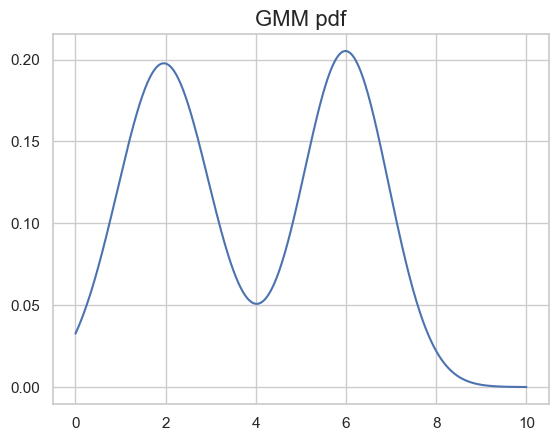

In [10]:
fig, ax = plt.subplots()
ax.plot(np.linspace(0, 10, 1000), pdf)
ax.set_title('GMM pdf', fontsize=16)

Then, we do clustering: divide the data into two clusters corresponding to the two Gaussian components 

In [11]:
cluster_label=GMM.predict(data.reshape(-1,1))
cluster_label

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,

Text(0.5, 1.0, 'clustering result')

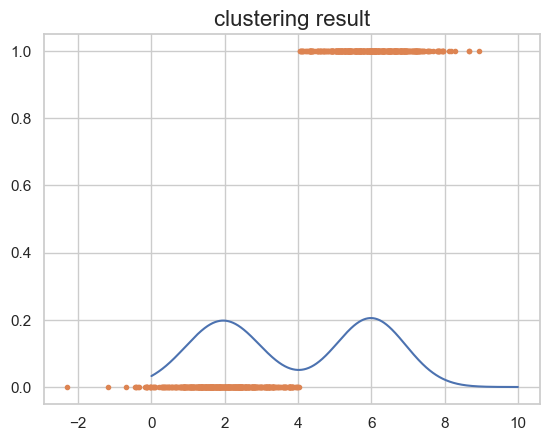

In [12]:
fig, ax = plt.subplots()
ax.plot(np.linspace(0, 10, 1000), pdf)
ax.plot(data, cluster_label, '.')
ax.set_title('clustering result', fontsize=16)

Text(0.5, 1.0, 'clustering result on new_data')

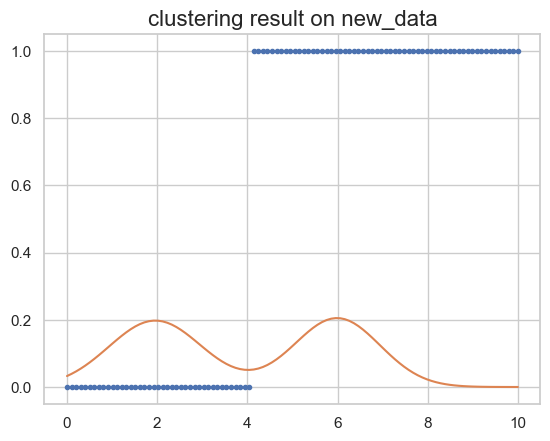

In [13]:
new_data = np.linspace(0, 10, 100).reshape(100,1)
new_label = GMM.predict(new_data)
new_score = GMM.score_samples(new_data)
pdf_value = np.exp(new_score) # pdf of the GMM

fig, ax = plt.subplots()
ax.plot(new_data, new_label, '.')
ax.plot(new_data, pdf_value)
ax.set_title('clustering result on new_data', fontsize=16)

In [14]:
new_data

array([[ 0.        ],
       [ 0.1010101 ],
       [ 0.2020202 ],
       [ 0.3030303 ],
       [ 0.4040404 ],
       [ 0.50505051],
       [ 0.60606061],
       [ 0.70707071],
       [ 0.80808081],
       [ 0.90909091],
       [ 1.01010101],
       [ 1.11111111],
       [ 1.21212121],
       [ 1.31313131],
       [ 1.41414141],
       [ 1.51515152],
       [ 1.61616162],
       [ 1.71717172],
       [ 1.81818182],
       [ 1.91919192],
       [ 2.02020202],
       [ 2.12121212],
       [ 2.22222222],
       [ 2.32323232],
       [ 2.42424242],
       [ 2.52525253],
       [ 2.62626263],
       [ 2.72727273],
       [ 2.82828283],
       [ 2.92929293],
       [ 3.03030303],
       [ 3.13131313],
       [ 3.23232323],
       [ 3.33333333],
       [ 3.43434343],
       [ 3.53535354],
       [ 3.63636364],
       [ 3.73737374],
       [ 3.83838384],
       [ 3.93939394],
       [ 4.04040404],
       [ 4.14141414],
       [ 4.24242424],
       [ 4.34343434],
       [ 4.44444444],
       [ 4

Calculate posterior probability of data under each Gaussian in the model.

Text(0.5, 1.0, 'posterior probability')

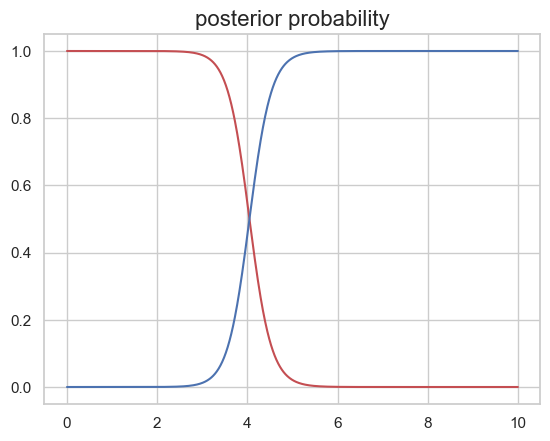

In [15]:
prob=GMM.predict_proba(np.linspace(0, 10, 1000).reshape(1000,1))
fig, ax = plt.subplots()
ax.plot(np.linspace(0, 10, 1000), prob[:,0], 'r')
ax.plot(np.linspace(0, 10, 1000), prob[:,1], 'b')
ax.set_title('posterior probability', fontsize=16)